In [11]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , AdaBoostClassifier , StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score , precision_score , recall_score ,f1_score , roc_auc_score ,ConfusionMatrixDisplay ,confusion_matrix , roc_curve,RocCurveDisplay
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import optuna
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [12]:
df = pd.read_csv('kidney_disease_@.csv')

In [13]:
df.age.min()

2.0

bp		-	blood pressure
			sg		-	specific gravity
			al		-   	albumin
			su		-	sugar
			rbc		-	red blood cells
			pc		-	pus cell
			pcc		-	pus cell clumps
			ba		-	bacteria
			bgr		-	blood glucose random
			bu		-	blood urea
			sc		-	serum creatinine
			sod		-	sodium
			pot		-	potassium
			hemo		-	hemoglobin
			pcv		-	packed cell volume
			wc		-	white blood cell count
			rc		-	red blood cell count
			htn		-	hypertension
			dm		-	diabetes mellitus
			cad		-	coronary artery disease
			appet		-	appetite
			pe		-	pedal edema
			ane		-	anemia
			class		-	class	

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [15]:
df.drop(columns=['id'],inplace=True)

In [16]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [17]:
df.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [18]:
cat_cols=df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(exclude='object').columns

In [23]:
df.aanemia.value_counts()

aanemia
no     339
yes     60
Name: count, dtype: int64

In [9]:
cat_cols

Index(['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
       'hypertension', 'diabetes_mellitus', 'coronary_artery_disease',
       'appetite', 'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [10]:
def unique_vals(x):
    for cols in x:
         print(f"{cols} have : {df[cols].unique()}")

In [11]:
unique_vals(num_cols)

age have : [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
blood_pressure have : [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
specific_gravity have : [1.02  1.01  1.005 1.015   nan 1.025]
albumin have : [ 1.  4.  2.  3.  0. nan  5.]
sugar have : [ 0.  3.  4.  1. nan  2.  5.]
blood_glucose_random have : [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158.
 165. 132. 104. 127. 415. 169. 251. 109. 280. 210. 219. 295.  94. 172.
 101. 298. 153.  88. 226. 143. 115.  89. 297. 233. 294. 323. 12

In [12]:
unique_vals(cat_cols)

red_blood_cells have : [nan 'normal' 'abnormal']
pus_cell have : ['normal' 'abnormal' nan]
pus_cell_clumps have : ['notpresent' 'present' nan]
bacteria have : ['notpresent' 'present' nan]
packed_cell_volume have : ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']
white_blood_cell_count have : ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100'

In [13]:
df.loc[df[df['packed_cell_volume']=='\t?'].index,'packed_cell_volume']=np.nan
df['packed_cell_volume']=df['packed_cell_volume'].str.replace('\t43','43')

In [14]:
df['packed_cell_volume']=df.packed_cell_volume.astype(float)

In [15]:
df.loc[df[(df['white_blood_cell_count']=='\t8400')|(df['white_blood_cell_count']=='\t?')|(df['white_blood_cell_count']=='\t6200')].index,'white_blood_cell_count']=np.nan

In [16]:
df['white_blood_cell_count']=df.white_blood_cell_count.astype(float)

In [17]:
df.loc[df[df['red_blood_cell_count']=='\t?'].index,'red_blood_cell_count']=np.nan
df['red_blood_cell_count']=df.red_blood_cell_count.astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [19]:
df['class']=df['class'].str.replace('ckd\t','ckd')

In [20]:
df['class'].value_counts()

class
ckd       250
notckd    150
Name: count, dtype: int64

In [21]:
df['diabetes_mellitus'] = df.diabetes_mellitus.str.strip().str.replace('\tno','no' ).str.replace('\tyes','yes')

In [22]:
df['coronary_artery_disease'] = df.coronary_artery_disease.str.replace('\tno','no')

In [23]:
df.coronary_artery_disease.value_counts()

coronary_artery_disease
no     364
yes     34
Name: count, dtype: int64

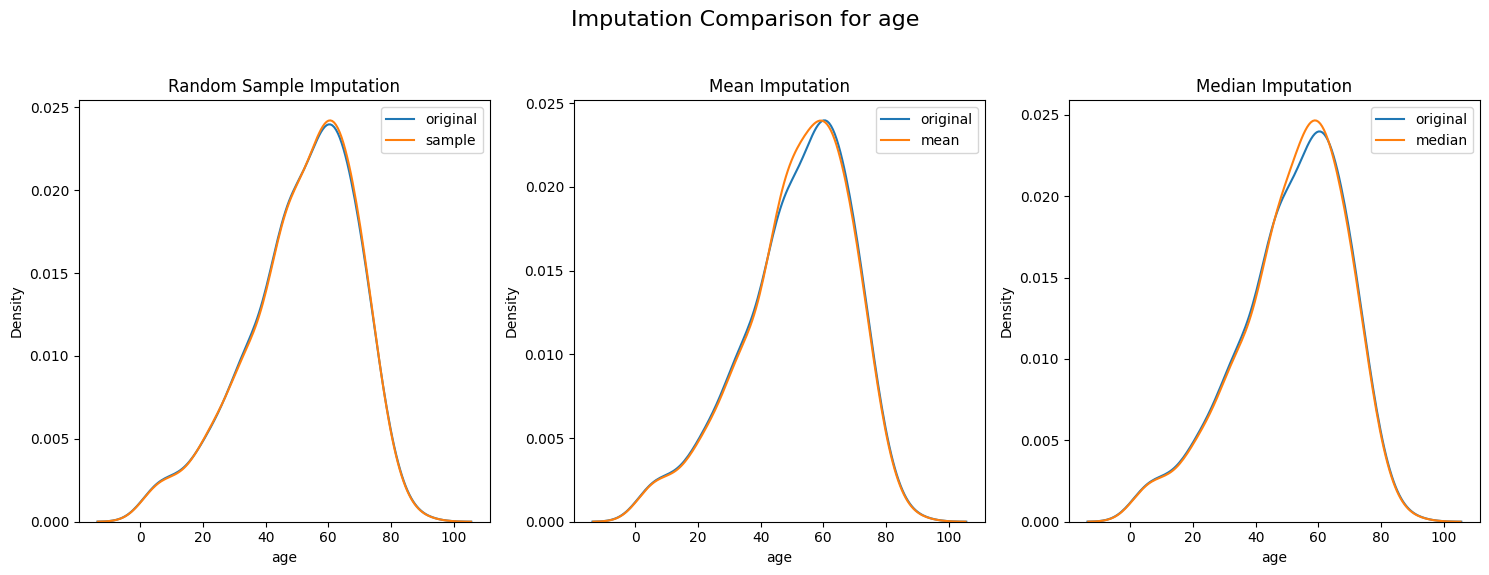

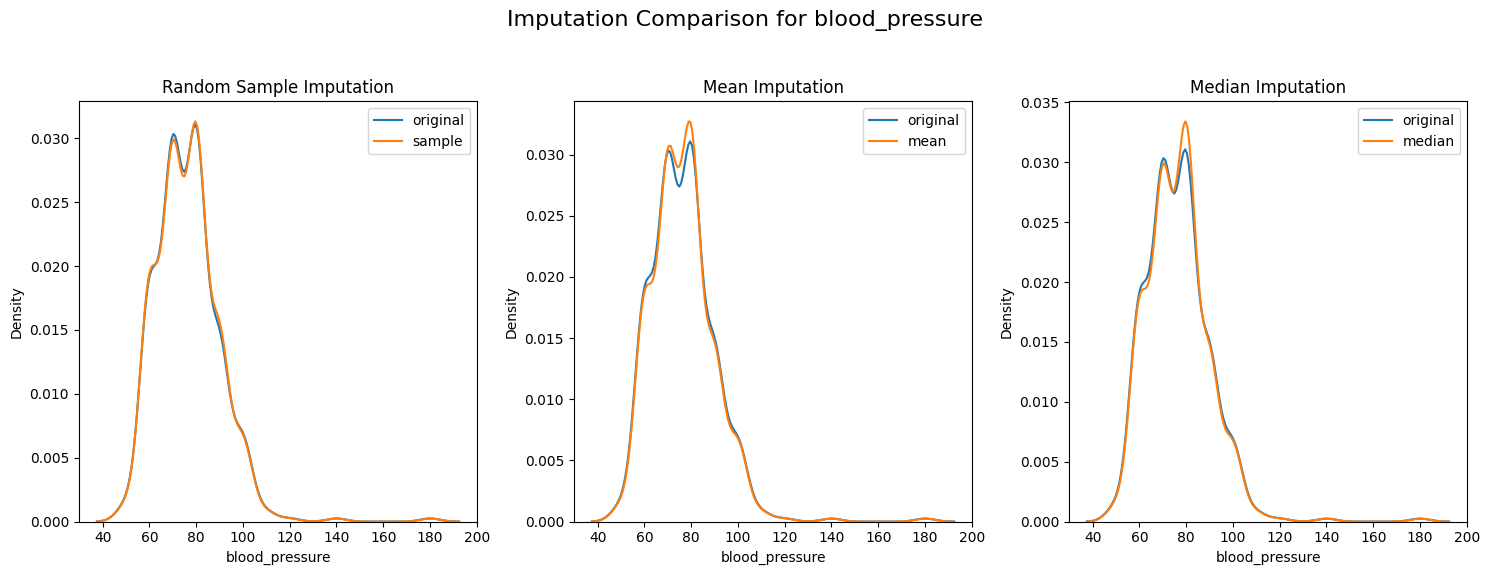

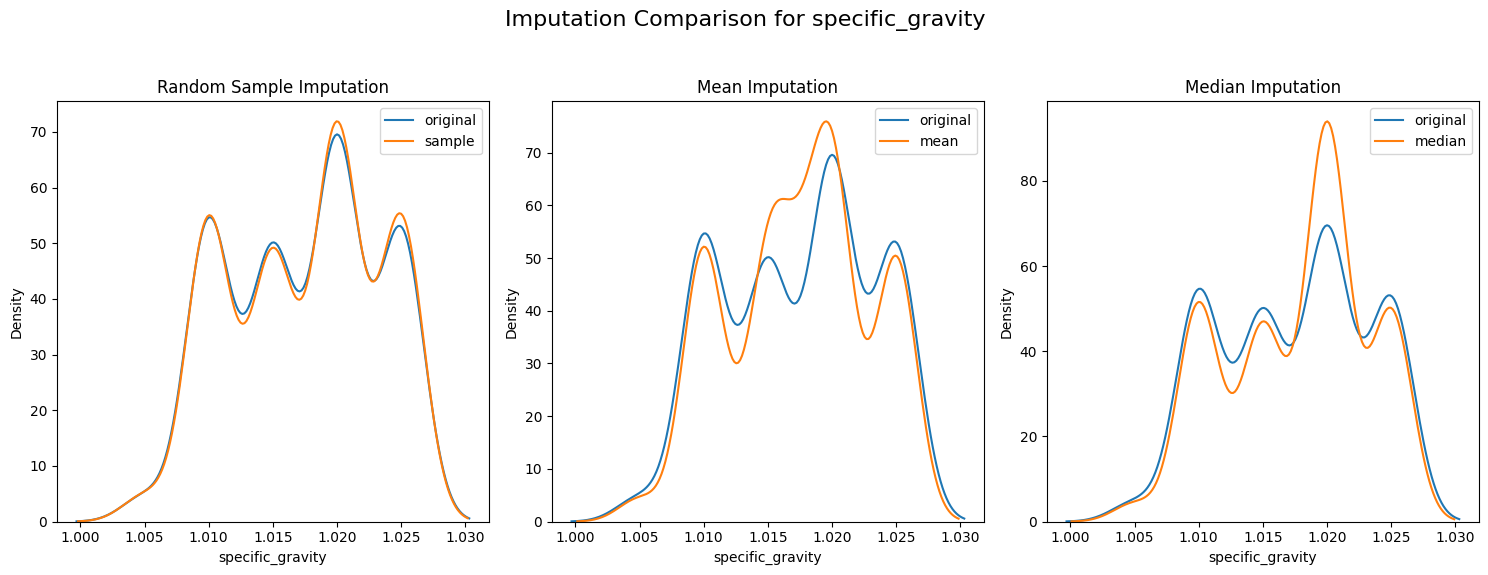

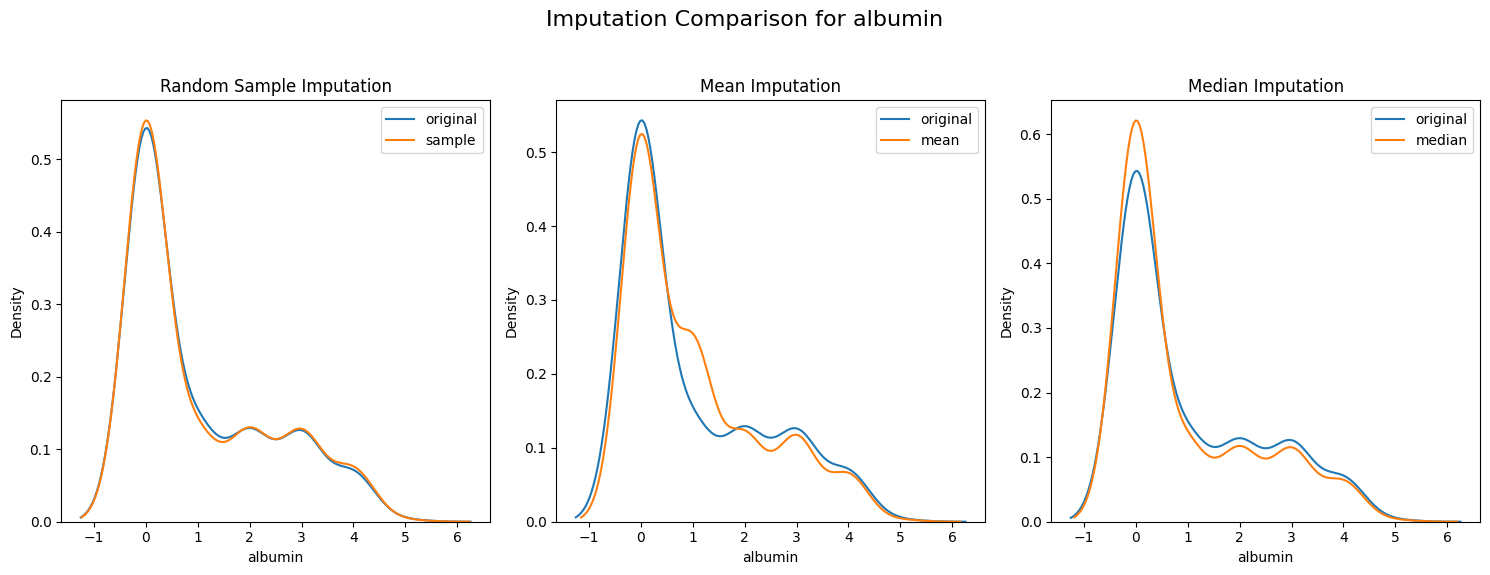

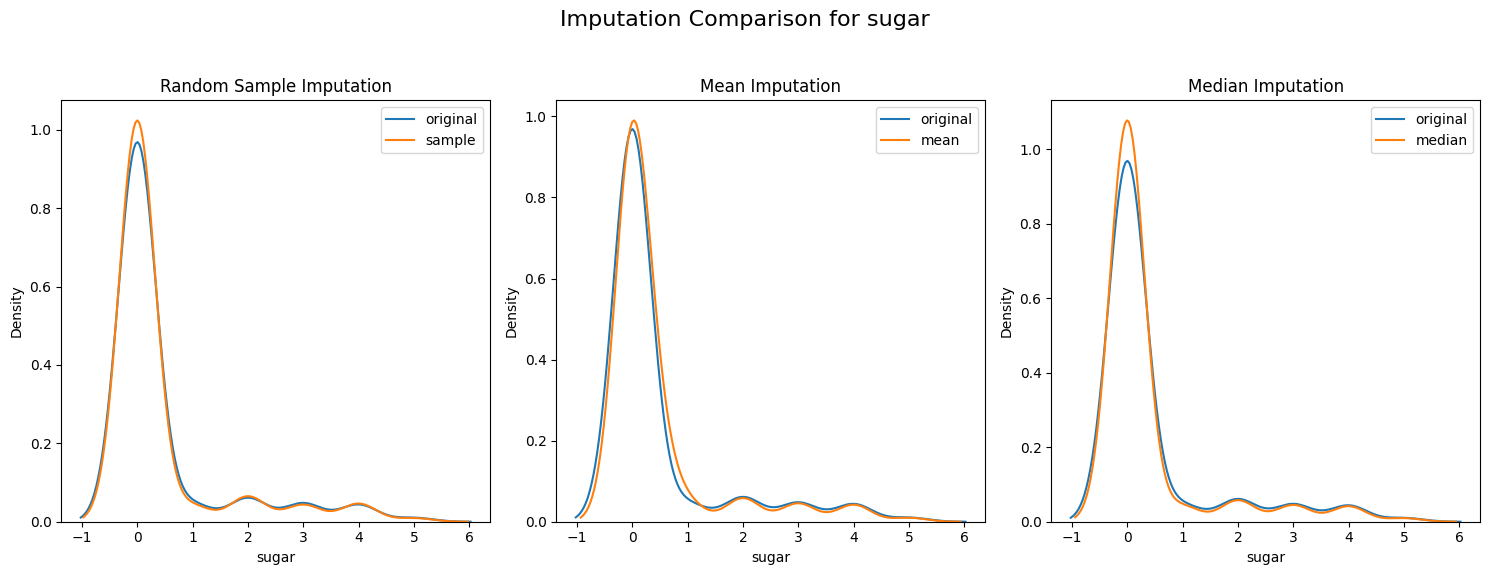

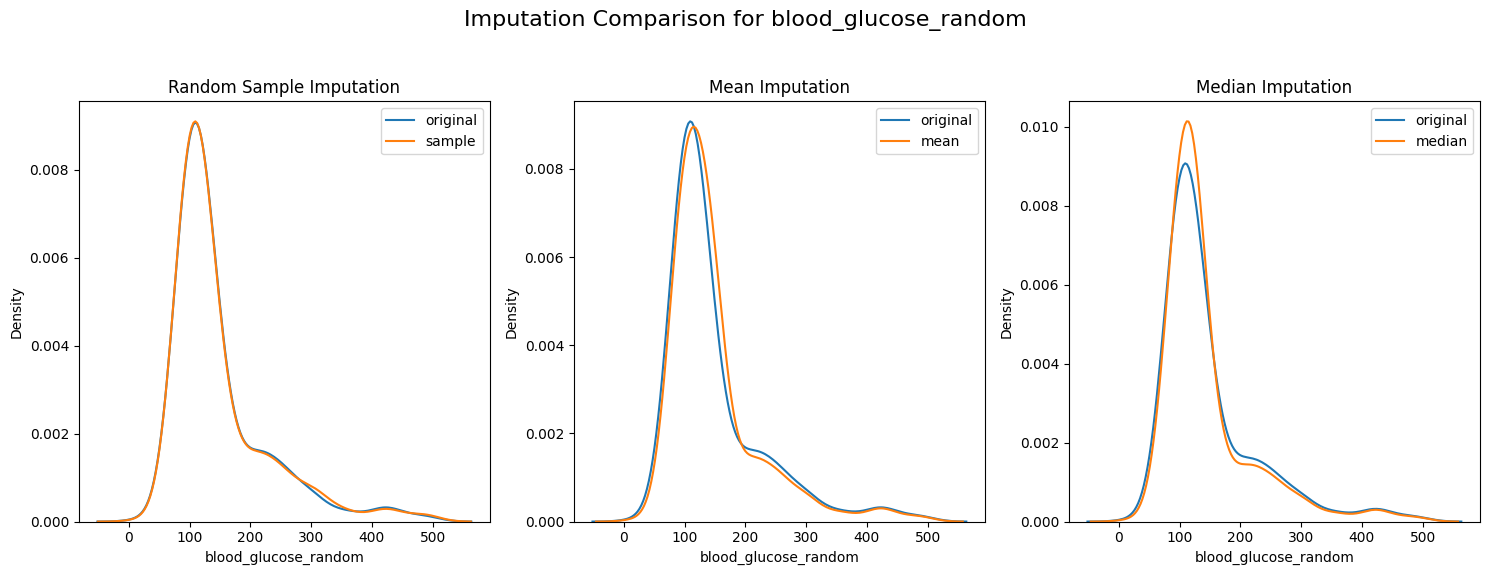

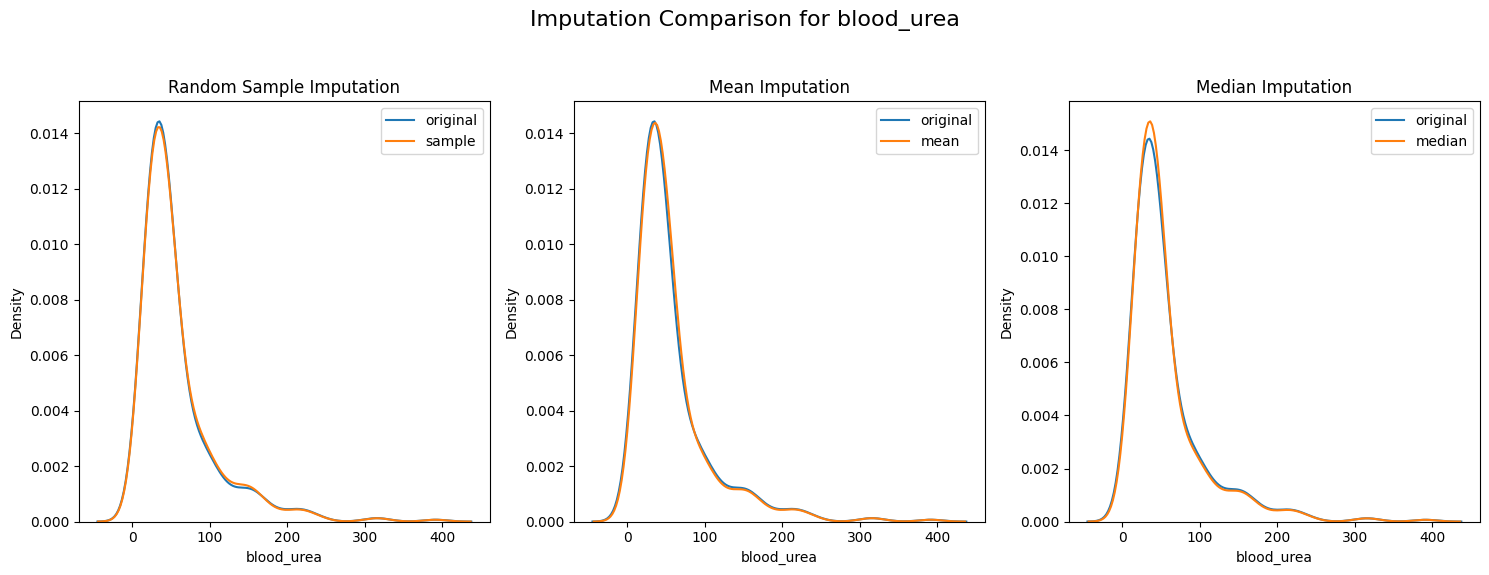

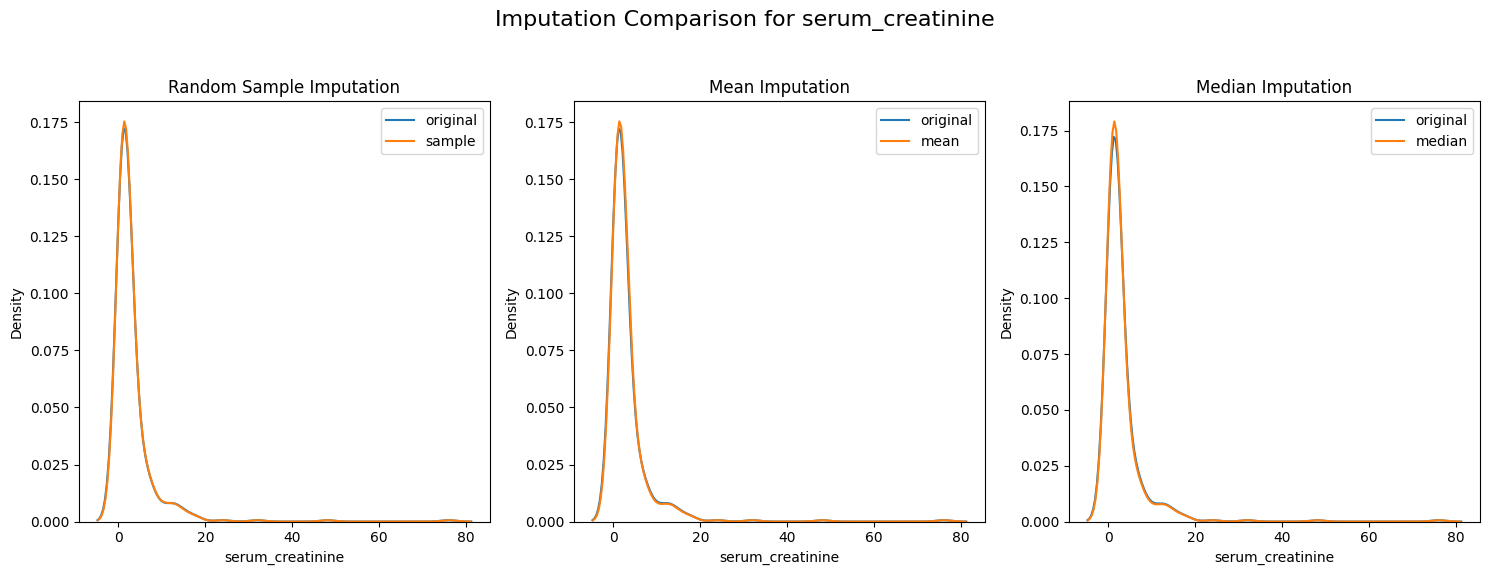

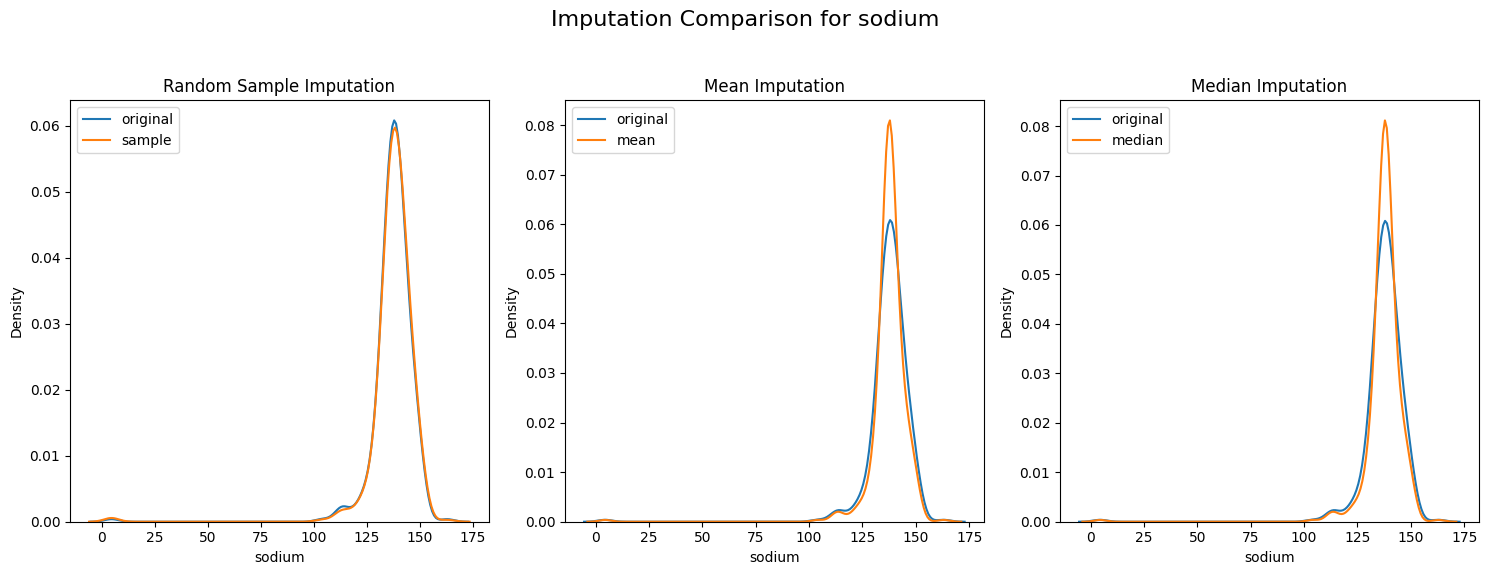

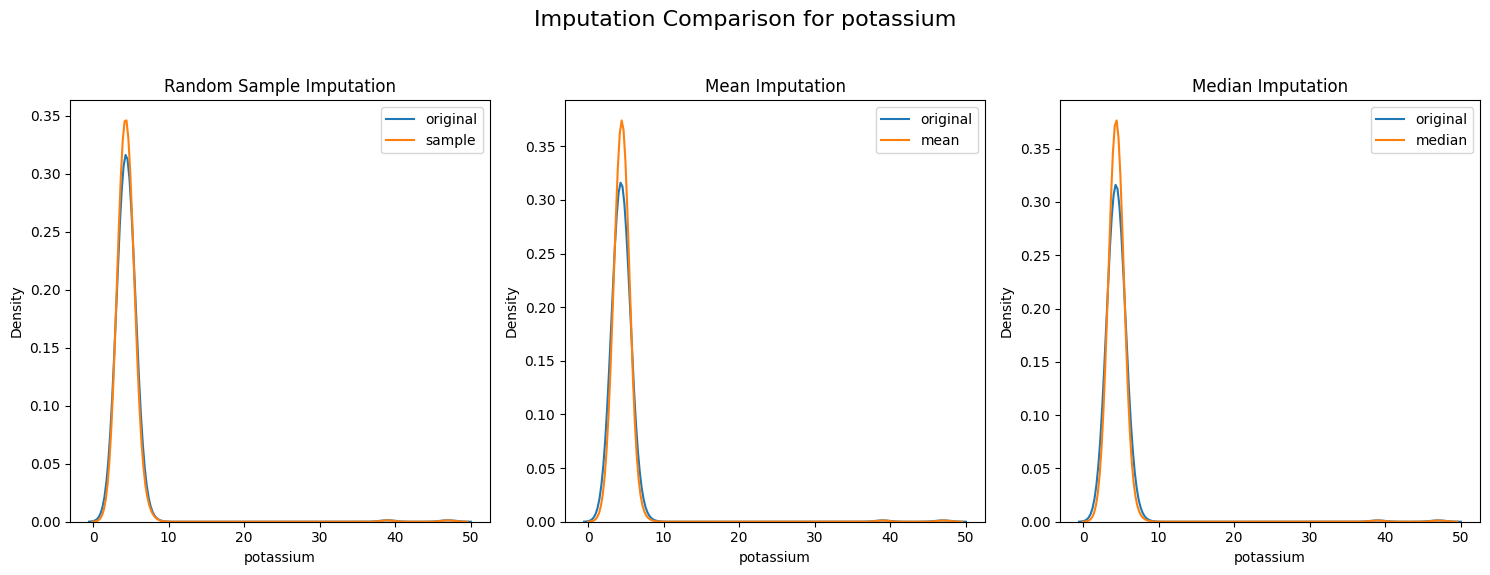

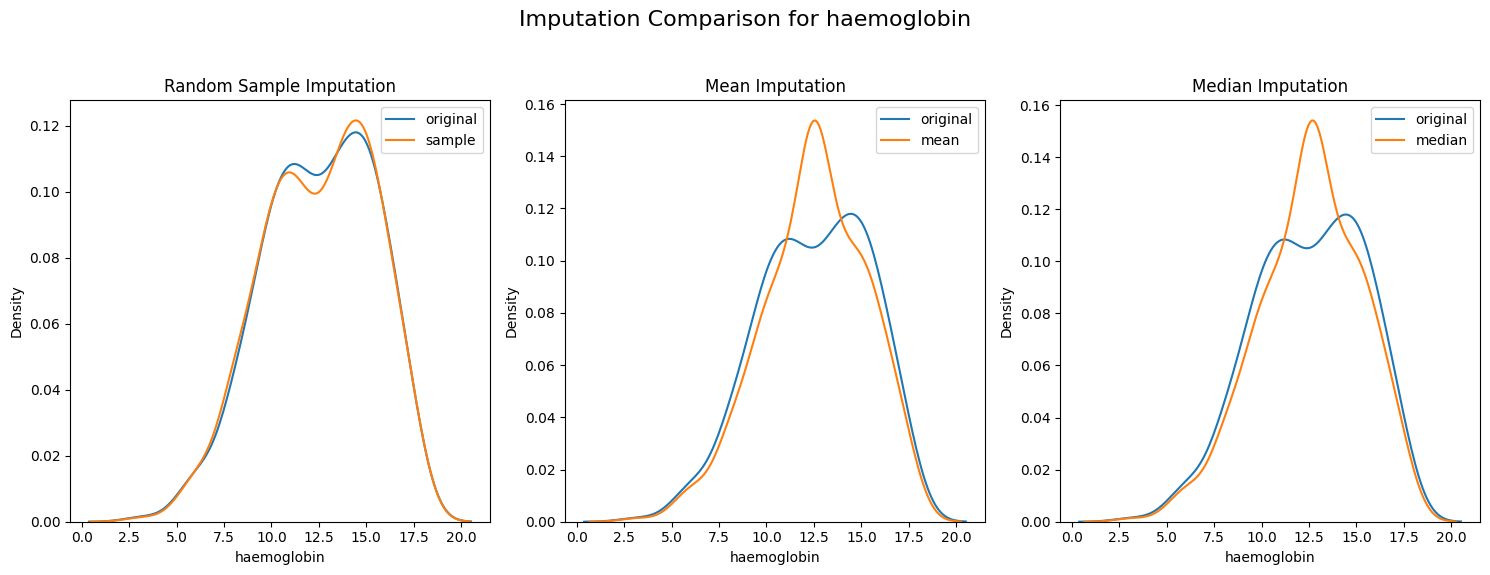

In [24]:

for feature in num_cols:
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
    fig.suptitle(f'Imputation Comparison for {feature}', fontsize=16)

    if df[feature].isnull().sum() == 0:
        print(f"[SKIPPED] {feature} has no missing values.")
        plt.close(fig)
        continue

    # Random sample imputation
    sampled_vals = df[feature].dropna().sample(df[feature].isna().sum(), replace=True, random_state=42)
    sample_imputed = df[feature].copy()
    sample_imputed[df[feature].isna()] = sampled_vals.values
    sns.kdeplot(df[feature], label='original', ax=axes[0])
    sns.kdeplot(sample_imputed, label='sample', ax=axes[0])
    axes[0].set_title("Random Sample Imputation")
    axes[0].legend()

    # Mean imputation
    mean_imputed = df[feature].fillna(df[feature].mean())
    sns.kdeplot(df[feature], label='original', ax=axes[1])
    sns.kdeplot(mean_imputed, label='mean', ax=axes[1])
    axes[1].set_title("Mean Imputation")
    axes[1].legend()

    # Median imputation
    median_imputed = df[feature].fillna(df[feature].median())
    sns.kdeplot(df[feature], label='original', ax=axes[2])
    sns.kdeplot(median_imputed, label='median', ax=axes[2])
    axes[2].set_title("Median Imputation")
    axes[2].legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


In [25]:
def random_sampling(feature):
    sampled_vals = df[feature].dropna().sample(df[feature].isna().sum(), replace=True, random_state=42)
    df[feature][df[feature].isna()] = sampled_vals.values

def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [26]:
for col in num_cols:
    random_sampling(col)

C:\Users\sayan\AppData\Local\Temp\ipykernel_12172\153944060.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[feature][df[feature].isna()] = sampled_vals.values
C:\Users\sayan\AppData\Local\Temp\ipykernel_12172\153944060.py:3: SettingWi

In [27]:
df[num_cols].isna().sum()

age                     0
blood_pressure          0
specific_gravity        0
albumin                 0
sugar                   0
blood_glucose_random    0
blood_urea              0
serum_creatinine        0
sodium                  0
potassium               0
haemoglobin             0
dtype: int64

In [30]:
df[cat_cols].isna().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [29]:
random_sampling('red_blood_cells')
random_sampling('pus_cell')

for col in cat_cols:
    impute_mode(col)

C:\Users\sayan\AppData\Local\Temp\ipykernel_12172\153944060.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[feature][df[feature].isna()] = sampled_vals.values
C:\Users\sayan\AppData\Local\Temp\ipykernel_12172\153944060.py:3: SettingWi

In [33]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} featues ")

red_blood_cells has 2 featues 
pus_cell has 2 featues 
pus_cell_clumps has 2 featues 
bacteria has 2 featues 
hypertension has 2 featues 
diabetes_mellitus has 2 featues 
coronary_artery_disease has 2 featues 
appetite has 2 featues 
peda_edema has 2 featues 
aanemia has 2 featues 
class has 2 featues 


In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_cols:
    df[col]=le.fit_transform(df[col])

In [35]:
unique_vals(cat_cols)

red_blood_cells have : [1 0]
pus_cell have : [1 0]
pus_cell_clumps have : [0 1]
bacteria have : [0 1]
hypertension have : [1 0]
diabetes_mellitus have : [1 0]
coronary_artery_disease have : [0 1]
appetite have : [0 1]
peda_edema have : [0 1]
aanemia have : [0 1]
class have : [0 1]


In [36]:
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,308.0,...,38.0,6000.0,5.2,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,5.2,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,0,0,0,0,0,1


In [38]:
X = df.drop('class', axis = 1)
y = df['class']

df.to_csv("kidney_cleaned.csv")

In [111]:
X_train,X_test, y_train, y_test =  train_test_split(X,y, test_size = 0.3, random_state = 42)

In [112]:
class ModelBuilder:
    def __init__(self, model, x_train, x_test, y_train, y_test):
        self.model = model
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
        
        
    def train_model(self):
        self.model.fit(self.x_train,self.y_train)
        return self.model.predict(self.x_test)
    
    def evaluate_model(self, y_pred_class):
        print("\n")
        print("*"*30)
        self.result_metrics = self.evaluate_metrics(y_pred_class)
        print("*"*30)
        print("\n")
        
        self.classification_report(y_pred_class)
        print("*"*30)
        print("\n")
        self.confusion_matrix(y_pred_class)
            
        print("*"*30)
        print("\n")
        
        RocCurveDisplay.from_estimator(self.model, self.x_test, self.y_test)
        
        return self.result_metrics
        
    def evaluate_metrics(self, y_pred_class):
        result_metrics = [] 
        accuracy = accuracy_score(self.y_test, y_pred_class)
        precision = precision_score(self.y_test, y_pred_class)
        recall = recall_score(self.y_test, y_pred_class)
        f1score = f1_score(self.y_test, y_pred_class)
        y_pred_prob = self.model.predict_proba(self.x_test)[:,1]
        roc_auc = roc_auc_score(self.y_test, y_pred_prob)
        
        print(f"Accuracy is : {accuracy*100:.1f}%")
        print(f"Precision is : {precision*100:.1f}%")
        print(f"Recall is : {recall*100:.1f}%")
        print(f"F1 Score is : {f1score*100:.1f}%")
        print(f"Roc-Auc Score is:{roc_auc*100:.1f}%")
        
        result_metrics.append(accuracy)
        result_metrics.append(precision)
        result_metrics.append(recall)
        result_metrics.append(f1score)
        result_metrics.append(roc_auc)
        return result_metrics
        
    def confusion_matrix(self, y_pred_class):
        cm = confusion_matrix(self.y_test, y_pred_class)
        self.plot_confusion_matrix(cm,[0,1])
        
        
    def plot_confusion_matrix(self, data, labels):
        sns.set(color_codes=True)
        plt.title("Confusion Matrix")
        ax = sns.heatmap(data/np.sum(data), annot=True, cmap="Blues", fmt=".2%")
 
        ax.set_xticklabels(labels)
        ax.set_yticklabels(labels)
 
        ax.set(ylabel="True Values", xlabel="Predicted Values")
        plt.show()
        
    def classification_report(self, y_pred_class):
        print(classification_report(self.y_test, y_pred_class))
               



******************************
Accuracy is : 97.5%
Precision is : 95.6%
Recall is : 97.7%
F1 Score is : 96.6%
Roc-Auc Score is:99.6%
******************************


              precision    recall  f1-score   support

           0       0.99      0.97      0.98        76
           1       0.96      0.98      0.97        44

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120

******************************




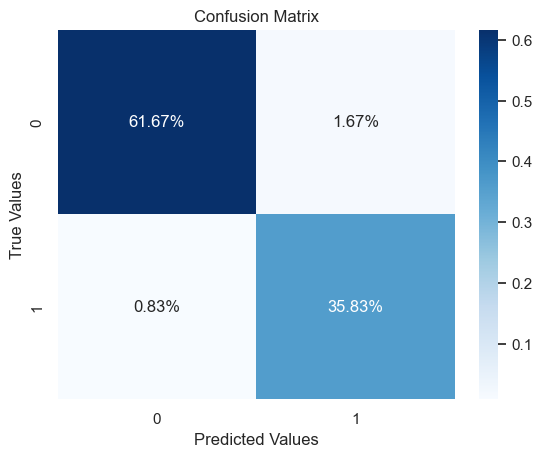

******************************




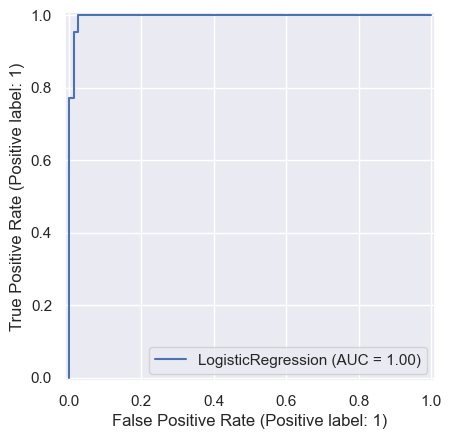

In [113]:
# build logistic model
logreg_ci = LogisticRegression(random_state=42, max_iter=100,solver='liblinear', class_weight="balanced")
lr_ci_modebuilder = ModelBuilder(logreg_ci, X_train, X_test, y_train, y_test)

# Train and Predict the Test Labels
y_pred_class  = lr_ci_modebuilder.train_model()
lr_metrics = lr_ci_modebuilder.evaluate_model(y_pred_class)



******************************
Accuracy is : 83.3%
Precision is : 68.8%
Recall is : 100.0%
F1 Score is : 81.5%
Roc-Auc Score is:93.9%
******************************


              precision    recall  f1-score   support

           0       1.00      0.74      0.85        76
           1       0.69      1.00      0.81        44

    accuracy                           0.83       120
   macro avg       0.84      0.87      0.83       120
weighted avg       0.89      0.83      0.84       120

******************************




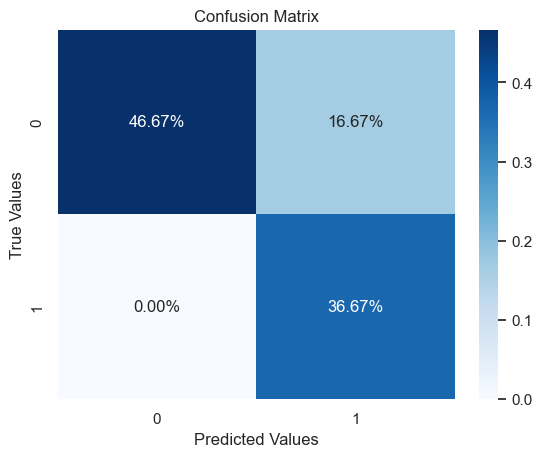

******************************




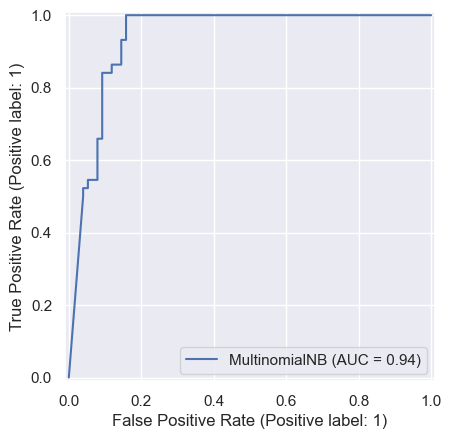

In [114]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB 
mnb = MultinomialNB(alpha=1.0)
mnb_modebuilder = ModelBuilder(mnb, X_train, X_test, y_train, y_test)
# Train and Predict the Test Labels
y_pred_class  = mnb_modebuilder.train_model()
nb_metrics = mnb_modebuilder.evaluate_model(y_pred_class)



******************************
Accuracy is : 97.5%
Precision is : 95.6%
Recall is : 97.7%
F1 Score is : 96.6%
Roc-Auc Score is:97.5%
******************************


              precision    recall  f1-score   support

           0       0.99      0.97      0.98        76
           1       0.96      0.98      0.97        44

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120

******************************




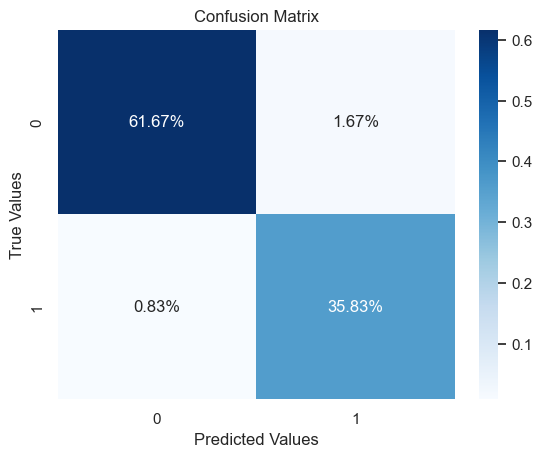

******************************




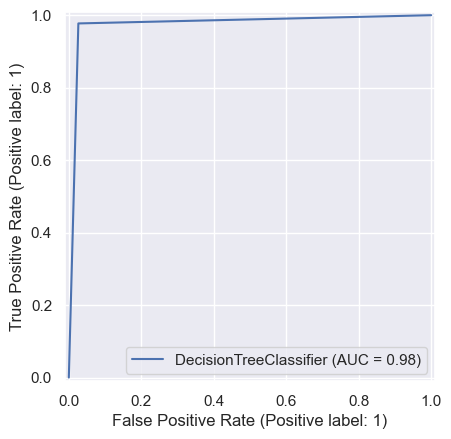

In [115]:
dt = DecisionTreeClassifier(random_state=42, criterion="gini", max_depth=10)
dt_modelbuilder = ModelBuilder(dt, X_train, X_test, y_train, y_test)
y_pred_class  = dt_modelbuilder.train_model()
dt_metrics_cv = dt_modelbuilder.evaluate_model(y_pred_class)



******************************
Accuracy is : 99.2%
Precision is : 100.0%
Recall is : 97.7%
F1 Score is : 98.9%
Roc-Auc Score is:100.0%
******************************


              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       1.00      0.98      0.99        44

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

******************************




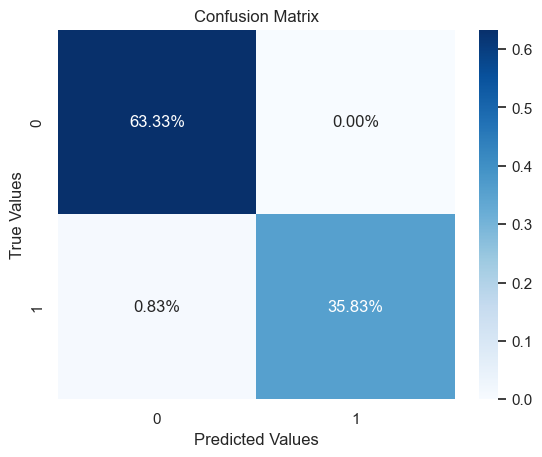

******************************




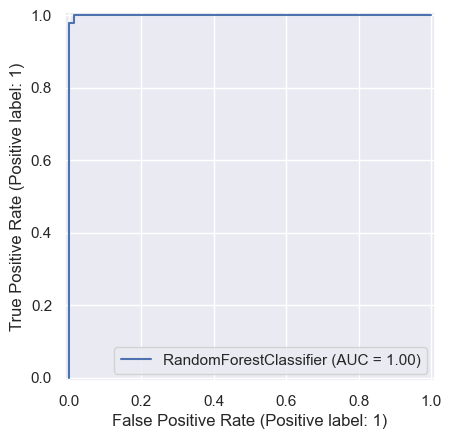

In [119]:
rf = RandomForestClassifier( random_state=42, criterion="gini")
rf_modebuilder = ModelBuilder(rf, X_train, X_test, y_train, y_test)
y_pred_class  = rf_modebuilder.train_model()
rf_metrics = rf_modebuilder.evaluate_model(y_pred_class)

In [120]:
params = {
    'max_depth': [2,3,5,7,8,10,15,18],
    'min_samples_leaf': [5,10,15,20,50],
    'n_estimators': [10,15,20,23,25,50,100]
}
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [121]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1)
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 280 candidates, totalling 1120 fits


C:\Users\sayan\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 7, 8, 10, 15, 18],
                         'min_samples_leaf': [5, 10, 15, 20, 50],
                         'n_estimators': [10, 15, 20, 23, 25, 50, 100]},
             verbose=1)



******************************
Accuracy is : 99.2%
Precision is : 100.0%
Recall is : 97.7%
F1 Score is : 98.9%
Roc-Auc Score is:100.0%
******************************


              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       1.00      0.98      0.99        44

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

******************************




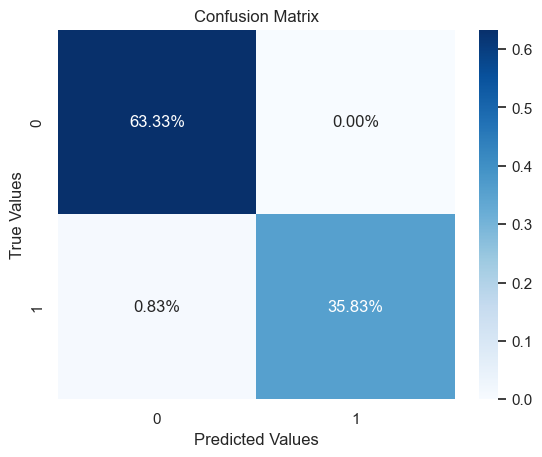

******************************




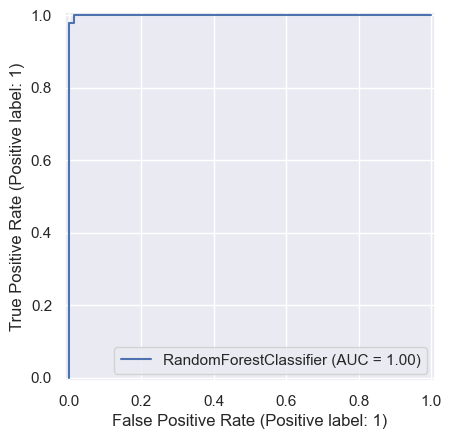

In [122]:
rf_best = grid_search.best_estimator_
rf_modebuilder2 = ModelBuilder(rf_best, X_train, X_test, y_train, y_test)
y_pred_class  = rf_modebuilder2.train_model()
rf_metrics2 = rf_modebuilder2.evaluate_model(y_pred_class)

[LightGBM] [Info] Number of positive: 106, number of negative: 174
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 506
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.378571 -> initscore=-0.495616
[LightGBM] [Info] Start training from score -0.495616
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

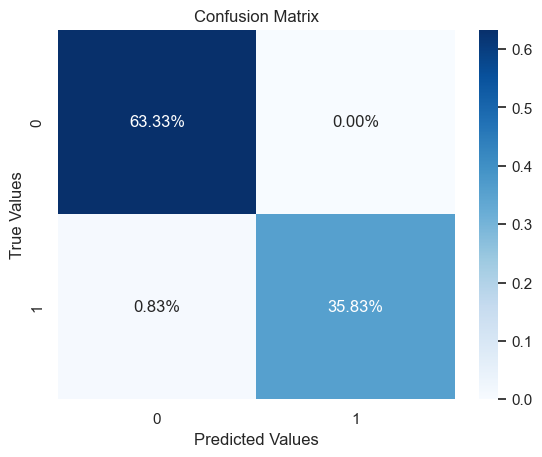

******************************




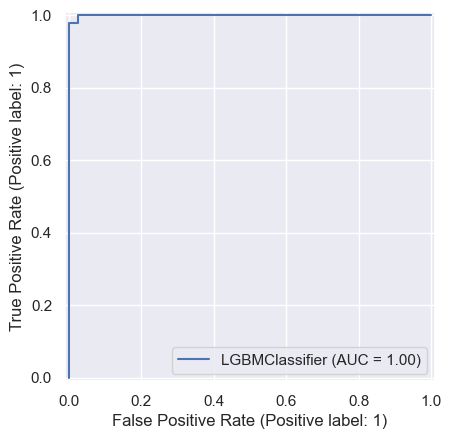

In [124]:
lgbm = LGBMClassifier()
lgbm_modebuilder = ModelBuilder(lgbm, X_train, X_test, y_train, y_test)
y_pred_class  = lgbm_modebuilder.train_model()
lgbm_metrics = lgbm_modebuilder.evaluate_model(y_pred_class)



******************************
Accuracy is : 98.3%
Precision is : 97.7%
Recall is : 97.7%
F1 Score is : 97.7%
Roc-Auc Score is:99.9%
******************************


              precision    recall  f1-score   support

           0       0.99      0.99      0.99        76
           1       0.98      0.98      0.98        44

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

******************************




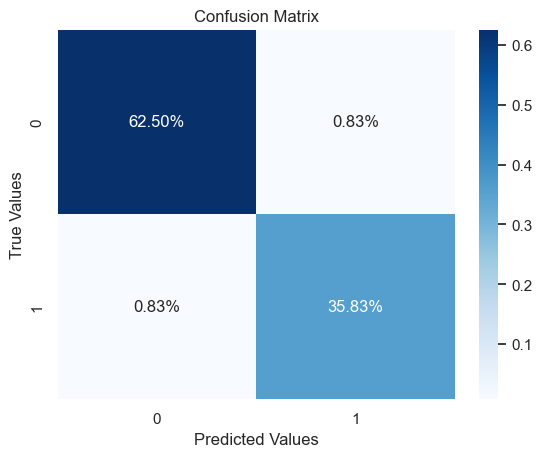

******************************




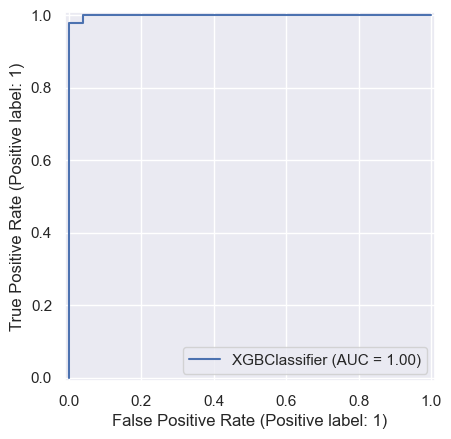

In [125]:
xg = XGBClassifier()
xgb_modebuilder = ModelBuilder(xg, X_train, X_test, y_train, y_test)
y_pred_class  = xgb_modebuilder.train_model()
xgb_metrics = xgb_modebuilder.evaluate_model(y_pred_class)

In [126]:
def objective(trial):
        model_name = trial.suggest_categorical("model",["SVC","RF","KNN","GB","XGB","LGBM"])

        if model_name == "SVC":
            kernel_svm = trial.suggest_categorical("kernel_svc",["linear","poly","rbf"])
            if kernel_svm == "linear":
                c_linear = trial.suggest_float("c_linear",0,5)
                model = SVC(C=c_linear,kernel="linear")

            elif kernel_svm == "poly":
                c_poly = trial.suggest_float("c_poly",0,10)
                degree_poly = trial.suggest_int("degree_poly",1,3)
                model = SVC(C=c_poly,degree=degree_poly,
                            kernel="poly")

            else:
                c_rbf = trial.suggest_float("c_rbf",0,100)
                gamma_rbf = trial.suggest_float("gamma_rbf",0,3)
                model = SVC(C=c_rbf,gamma=gamma_rbf,
                            kernel="rbf")
                

        elif model_name == "RF":
            n_estimators_rf = trial.suggest_int("n_estimators_rf",10,100)
            max_depth_rf = trial.suggest_int("max_depth_rf",2,10)
            model = RandomForestClassifier(n_estimators=n_estimators_rf,
                                        max_depth=max_depth_rf,
                                        random_state=42,
                                        n_jobs=-1)

        elif model_name == "GB":
            n_estimators_gb = trial.suggest_int("n_estimators_gb",10,100)
            learning_rate_gb = trial.suggest_float("learning_rate_gb",0,1)
            max_depth_gb = trial.suggest_int("max_depth_gb",2,20)
            model = GradientBoostingClassifier(n_estimators=n_estimators_gb,
                                                learning_rate=learning_rate_gb,
                                                max_depth=max_depth_gb,
                                                random_state=42)

        elif model_name == "KNN":
            n_neighbors_knn = trial.suggest_int("n_neighbors_knn",1,20)
            weights_knn = trial.suggest_categorical("weights_knn",["uniform","distance"])
            model = KNeighborsClassifier(n_neighbors=n_neighbors_knn,
                                        weights=weights_knn,n_jobs=-1)

        elif model_name == "XGB":
            n_estimators_xgb = trial.suggest_int("n_estimators_xgb",10,150)
            learning_rate_xgb = trial.suggest_float("learning_rate_xgb",0.1,0.5)
            max_depth_xgb = trial.suggest_int("max_depth_xgb",2,15)
            model = XGBClassifier(n_estimators=n_estimators_xgb,
                                    learning_rate=learning_rate_xgb,
                                    max_depth=max_depth_xgb,
                                    random_state=42,
                                    n_jobs=-1)

        elif model_name == "LGBM":
            n_estimators_lgbm = trial.suggest_int("n_estimators_lgbm",10,200)
            learning_rate_lgbm = trial.suggest_float("learning_rate_lgbm",0.1,0.5)
            max_depth_lgbm = trial.suggest_int("max_depth_lgbm",2,20)
            model = LGBMClassifier(n_estimators=n_estimators_lgbm,
                                    learning_rate=learning_rate_lgbm,
                                    max_depth=max_depth_lgbm,
                                    random_state=42,n_jobs=-1)


        # train the model
        model.fit(X_train,y_train)


        # get the predictions
        y_pred_train = model.predict(X_train)
        y_pred_test= model.predict(X_test)

        # calculate the error
        score = accuracy_score(y_test,y_pred_test)

        return score

In [127]:
study = optuna.create_study(direction="maximize",study_name="model_selection")

# optimize the objective function
study.optimize(objective,n_trials=30,n_jobs=-1)

[I 2025-06-05 21:21:10,669] A new study created in memory with name: model_selection
[I 2025-06-05 21:21:10,987] Trial 2 finished with value: 0.9833333333333333 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 53, 'learning_rate_lgbm': 0.2907013489163214, 'max_depth_lgbm': 3}. Best is trial 2 with value: 0.9833333333333333.
[I 2025-06-05 21:21:11,097] Trial 3 finished with value: 0.9916666666666667 and parameters: {'model': 'RF', 'n_estimators_rf': 10, 'max_depth_rf': 5}. Best is trial 3 with value: 0.9916666666666667.
[I 2025-06-05 21:21:11,168] Trial 5 finished with value: 0.9916666666666667 and parameters: {'model': 'GB', 'n_estimators_gb': 48, 'learning_rate_gb': 0.5847176948315906, 'max_depth_gb': 20}. Best is trial 3 with value: 0.9916666666666667.
[I 2025-06-05 21:21:11,180] Trial 9 finished with value: 0.775 and parameters: {'model': 'KNN', 'n_neighbors_knn': 1, 'weights_knn': 'distance'}. Best is trial 3 with value: 0.9916666666666667.
[I 2025-06-05 21:21:11,189] Trial 0

In [128]:
study.best_params

{'model': 'RF', 'n_estimators_rf': 10, 'max_depth_rf': 5}

In [129]:
study.best_value

0.9916666666666667

In [132]:
params = { 'n_estimators': 10, 'max_depth': 5}



******************************
Accuracy is : 99.2%
Precision is : 100.0%
Recall is : 97.7%
F1 Score is : 98.9%
Roc-Auc Score is:100.0%
******************************


              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       1.00      0.98      0.99        44

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

******************************




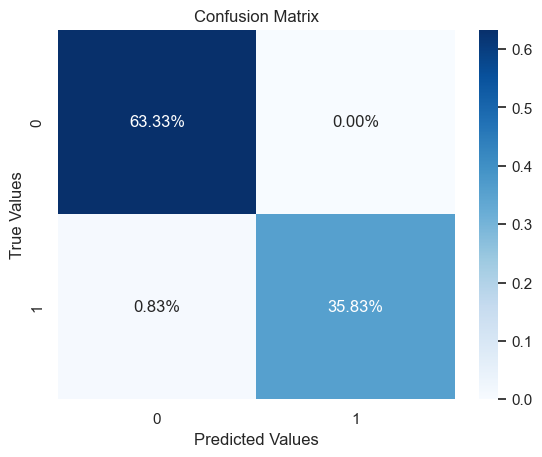

******************************




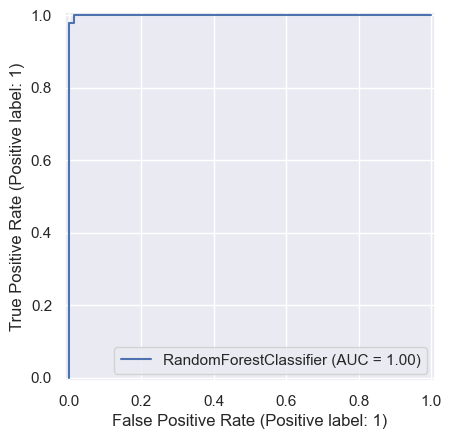

In [133]:
rf_optuna_model = RandomForestClassifier(**params)
rf_optuna_modebuilder = ModelBuilder(rf_optuna_model, X_train, X_test, y_train, y_test)
y_pred_class  = rf_optuna_modebuilder.train_model()
rf_optuna_metrics = rf_optuna_modebuilder.evaluate_model(y_pred_class)

In [138]:
metrics_table = {'Metric': ['Accuracy','Precision','Recall',
                       'F1Score','Auc Score'], 
        'Logistic Regression': lr_metrics,
        'Naive Bayes': nb_metrics,
        'Decision Tree': dt_metrics_cv,
        'Random Forest': rf_optuna_metrics,
        'XG Boost': xgb_metrics,
        'LightGBM': lgbm_metrics
        }

df_metrics = pd.DataFrame(metrics_table ,columns = ['Metric', 'Logistic Regression', 'Naive Bayes','Decision Tree','Random Forest',
                                                    'XG Boost','LightGBM'] )

df_metrics

,Metric,Logistic Regression,Naive Bayes,Decision Tree,Random Forest,XG Boost,LightGBM
0,Accuracy,0.975000,0.833333,0.975000,0.991667,0.983333,0.991667
1,Precision,0.955556,0.687500,0.955556,1.000000,0.977273,1.000000
2,Recall,0.977273,1.000000,0.977273,0.977273,0.977273,0.977273
3,F1Score,0.966292,0.814815,0.966292,0.988506,0.977273,0.988506
4,Auc Score,0.996411,0.938995,0.975478,0.999701,0.999103,0.999402


In [139]:
# We see both Optuna Random forest and default LightBGM performs similarly , so lets try a stacking and voting classifier

[LightGBM] [Info] Number of positive: 106, number of negative: 174
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 506
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.378571 -> initscore=-0.495616
[LightGBM] [Info] Start training from score -0.495616
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[LightGBM] [Info] Number of positive: 106, number of negative: 174
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000025 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 143
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.378571 -> initscore=-0.495616
[LightGBM] [Info] Start training from score -0.495616
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

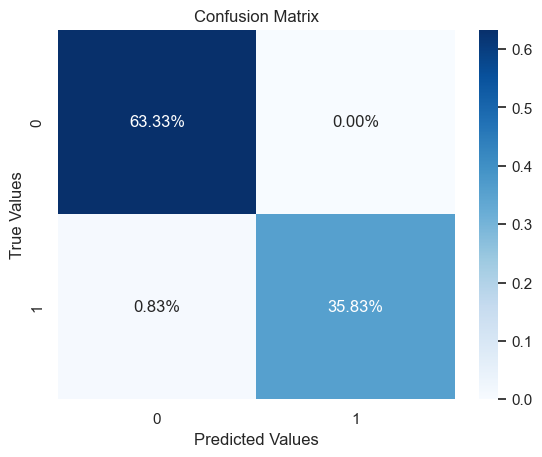

******************************




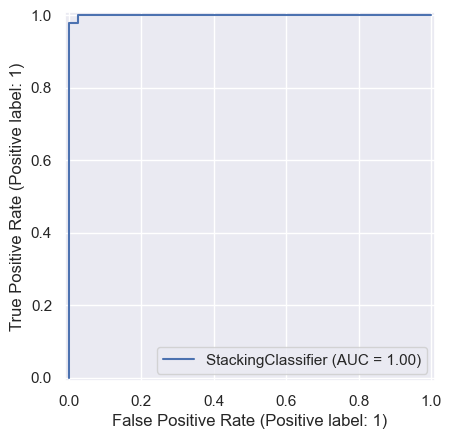

In [142]:
sc = StackingClassifier(estimators=[('lgbm',lgbm),('rf',rf_optuna_model)],final_estimator=lgbm,cv=5)
sc_modebuilder = ModelBuilder(sc, X_train, X_test, y_train, y_test)
y_pred_class  = sc_modebuilder.train_model()
sc_metrics = sc_modebuilder.evaluate_model(y_pred_class)  #almost same accuracy so lets move on with a simpler model like Random forest

In [137]:
# So Random forest with parameters params = { 'n_estimators': 10, 'max_depth': 5} is the best model ith 99.2% accuracy

[LightGBM] [Info] Number of positive: 106, number of negative: 174
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 506
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.378571 -> initscore=-0.495616
[LightGBM] [Info] Start training from score -0.495616
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

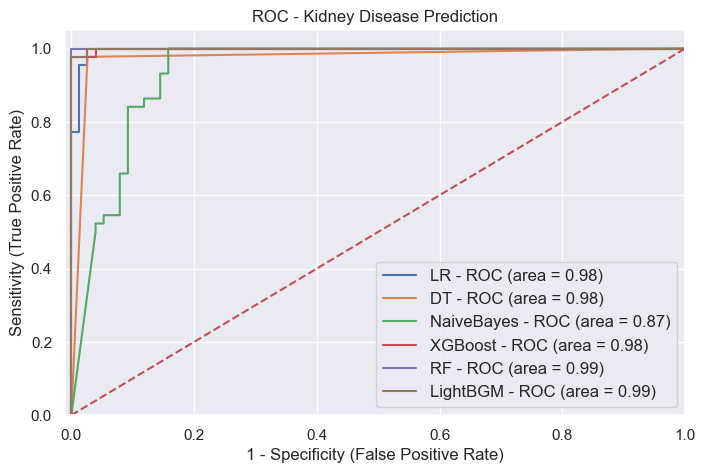

In [145]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': logreg_ci,
},
{
    'label': 'DT',
    'model': dt,
},
{
    'label': 'NaiveBayes',
    'model': mnb,
},
{
    'label': 'XGBoost',
    'model': xg,
},
{
    'label': 'RF',
    'model': rf_optuna_model,
},
{
    'label': 'LightBGM',
    'model': lgbm,
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Kidney Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_kidney.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show();

In [146]:
import pickle
model = rf_optuna_model
pickle.dump(model, open("kidney.pkl", 'wb'))

In [1]:
df

NameError: name 'df' is not defined